(ch_decision_trees)=
# Common Algorithms III - Decision Trees

Decision Trees are intuitive and easily interpretable models that mimic human decision-making processes. They work by partitioning the data into subsets that contain instances with similar values. This is done through a series of questions that segment the data based on feature values, ultimately leading to a decision at each leaf node. A simple example is shown in {numref}`fig_decision_tree_example`.

```{figure} ../images/fig_decision_tree_example.png
:name: fig_decision_tree_example

Decision trees are very intuitive to understand, but also to create! They can, in principle, both be designed and used manually. This sketch shows a very basic student classifier supposed to distinguish professors, employees, and students on campus. Admittedly, it will perform rather poorly, but you'll get the idea. 
```

## Building a Decision Tree
How can we build a decision tree, say to distinguish red squares from blue triangles in {numref}`fig_decision_tree_first_steps`?

```{figure} ../images/fig_decision_tree_first_steps.png
:name: fig_decision_tree_first_steps

To design a decision tree we could search for suitable decision boundaries that separate one species from the others (if the task is classification). After a first step (**A**), we will iteratively continue to **B** and further. 
```

That seems to work OK. But how could we automate this? What could be a good algorithm to find good decision boundaries for us?

### Automated Decision Tree Construction

To automate the construction of a decision tree, we need an algorithm that can systematically find the best features to split the data. Here’s how it typically works:

- **Choose the Best Split:** The algorithm evaluates all possible splits for each feature and selects the one that best separates the classes. This is often done using criteria like Gini impurity or entropy. In the following part the entropy will be explained in more detail.

- **Split the Data:** Once the best split is found, the data is divided into two subsets, and the process is repeated recursively for each subset.

- **Stopping Criteria:** The recursion continues until a stopping criterion is met, such as a maximum tree depth or a minimum number of samples per node.

### Entropy

Entropy is a key concept used in decision trees to measure the impurity or disorder within a set of data. It originates from information theory, where it quantifies the amount of uncertainty or randomness in a system. In the context of decision trees, entropy helps to determine how a dataset should be split to create the most informative and efficient structure.

#### What is Entropy?

Entropy, in the context of decision trees, is defined as:

$$
Entropy(S) = −\Sigma_{i=1}^N p_i ln (p_i)
$$

where:

- $S$ is the set of data.
- $N$ is the number of classes in the dataset.
- $p_i$ is the proportion of instances belonging to class $i$.

#### How Does Entropy Work in Decision Trees?

When building a decision tree, the goal is to split the data in a way that results in the highest information gain. Information gain is the reduction in entropy from a prior state (before the split) to a post-split state (after the split). Lower entropy means that the subsets are more homogenous (i.e., contain more instances of a single class), which is desirable.

1. **Initial Entropy**: Calculate the entropy of the entire dataset before any splits.
2. **Entropy After Split**: For each possible split, calculate the entropy of the resulting subsets.
3. **Information Gain**: Compute the information gain by comparing the initial entropy with the entropy after the split. The split that results in the highest information gain is chosen because it most effectively reduces the disorder.

#### Example:

Suppose we have a dataset with two classes, squares and triangles. Let's compare two possible splits in {numref}`fig_decision_tree_entropy`.

```{figure} ../images/fig_decision_tree_entropy.png
:name: fig_decision_tree_entropy

We here compare two possible splits (x > 3 or x > 3.5) to decide which one is better based on the entropy. 
```

If our dataset has an equal number of instances from each class, the entropy will be at its maximum, indicating high disorder. This is exactly what we start with in the beginning where we have 10 squares and 10 triangles. The probability to draw a square (or a triangle) is exactly 0.5.

$$
Entropy(S)= - (0.5 \cdot ln(0.5) + 0.5 \cdot ln(0.5)) = 1
$$

If we then only look at the left group after the split at $x > 3$:

$$
Entropy(S)= - (2/5 \cdot ln(2/5) + 3/5 \cdot ln(3/5)) \approx 0.971
$$

For a split at $x > 3.5$ the entropy becomes

$$
Entropy(S)= - 2/2 \cdot ln(2/2) = 0
$$

In comparison, it is clear that the second example represents a far greater change of entropy making this split favorable.

### From Entropy to Information Gain
In fact, the entropy itself has to be weighted to avoid only looking for splits with clear but very tiny groups at the end. One option to do so is by using the *information gain*:

$$
IG = E (parent) - \Sigma w_i E(child_i)
$$


### Advantages and Disadvantages of Decision Trees

```{figure} ../images/fig_decision_tree_issues.png
:name: fig_decision_tree_issues

Decision trees come with several possible shortcomings. When their depth is not limited they have a high risk of overfitting on the training data because they can in principle separate each data point and thereby memorize training data.
```

**Pros:**

- **Interpretability**: Decision trees are easy to understand and visualize, making them useful for communicating results.
- **Versatility**: They can handle both numerical and categorical data without needing feature scaling.
- **Non-linear Relationships**: Capable of capturing complex decision boundaries.

**Cons:**

- **Overfitting**: Decision trees can easily become too complex and overfit the training data, especially if they are very deep.
- **Instability**: Small changes in the data can result in completely different trees.
- **Bias**: They can be biased towards dominant classes in imbalanced datasets.

## Hands-on Example

We here again work with the [`Penguin Dataset`](https://allisonhorst.github.io/palmerpenguins/) {cite}`penguins`, now again to predict the species.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

### Data Inspection & Cleaning

In [2]:
filename = "../datasets/penguins_size.csv"  # contains some changes with respect to the original dataset!
data = pd.read_csv(filename)

In [11]:
data = data.dropna()

label_name = "species"
y = data[label_name]
X = data.drop(["species", "island"], axis=1)
X["sex"] = 1 * pd.get_dummies(X["sex"])["FEMALE"]
X = X.rename(columns={"sex": "female"})
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,female
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0


### Train/Test split

As done before, we will simply split the data into a training set and a test set.

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
# Let's check the outcome dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 5), (84, 5), (250,), (84,))

### Train a model (and make predictions)

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

**Compute predictions**  
Just as before with the k-NN model, we can simply create predictions on any data of the expected size (here: 4 features).

In [21]:
predictions = tree.predict(X_test)
predictions

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap'], dtype=obj

### Model evaluation

Precisely as we did for the kNN model we can now evaluate the model using our test set and by computing the confusion matrix.

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[42,  0,  0],
       [ 1, 15,  0],
       [ 0,  0, 26]], dtype=int64)

Just as we did for the kNN model we can also plot the confusion matrix.

<Axes: >

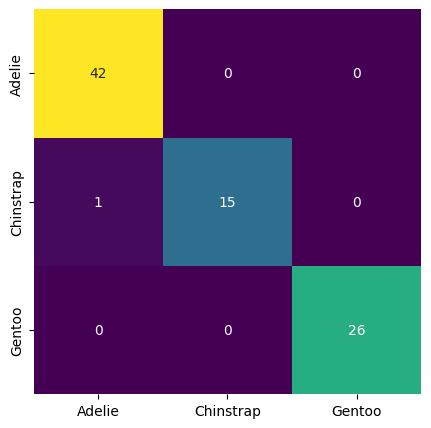

In [23]:
# or, visually a bit nicer:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test, predictions),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=tree.classes_,
           yticklabels=tree.classes_)

## The best part about trees: look at them!

The biggest advantage about decision trees is that they are fully interpretable. We can inspect what tree was learned and, at least in theory, could also use this to make predictions manually.

We can inspect the different layers individually, but we can also plot the entire tree.

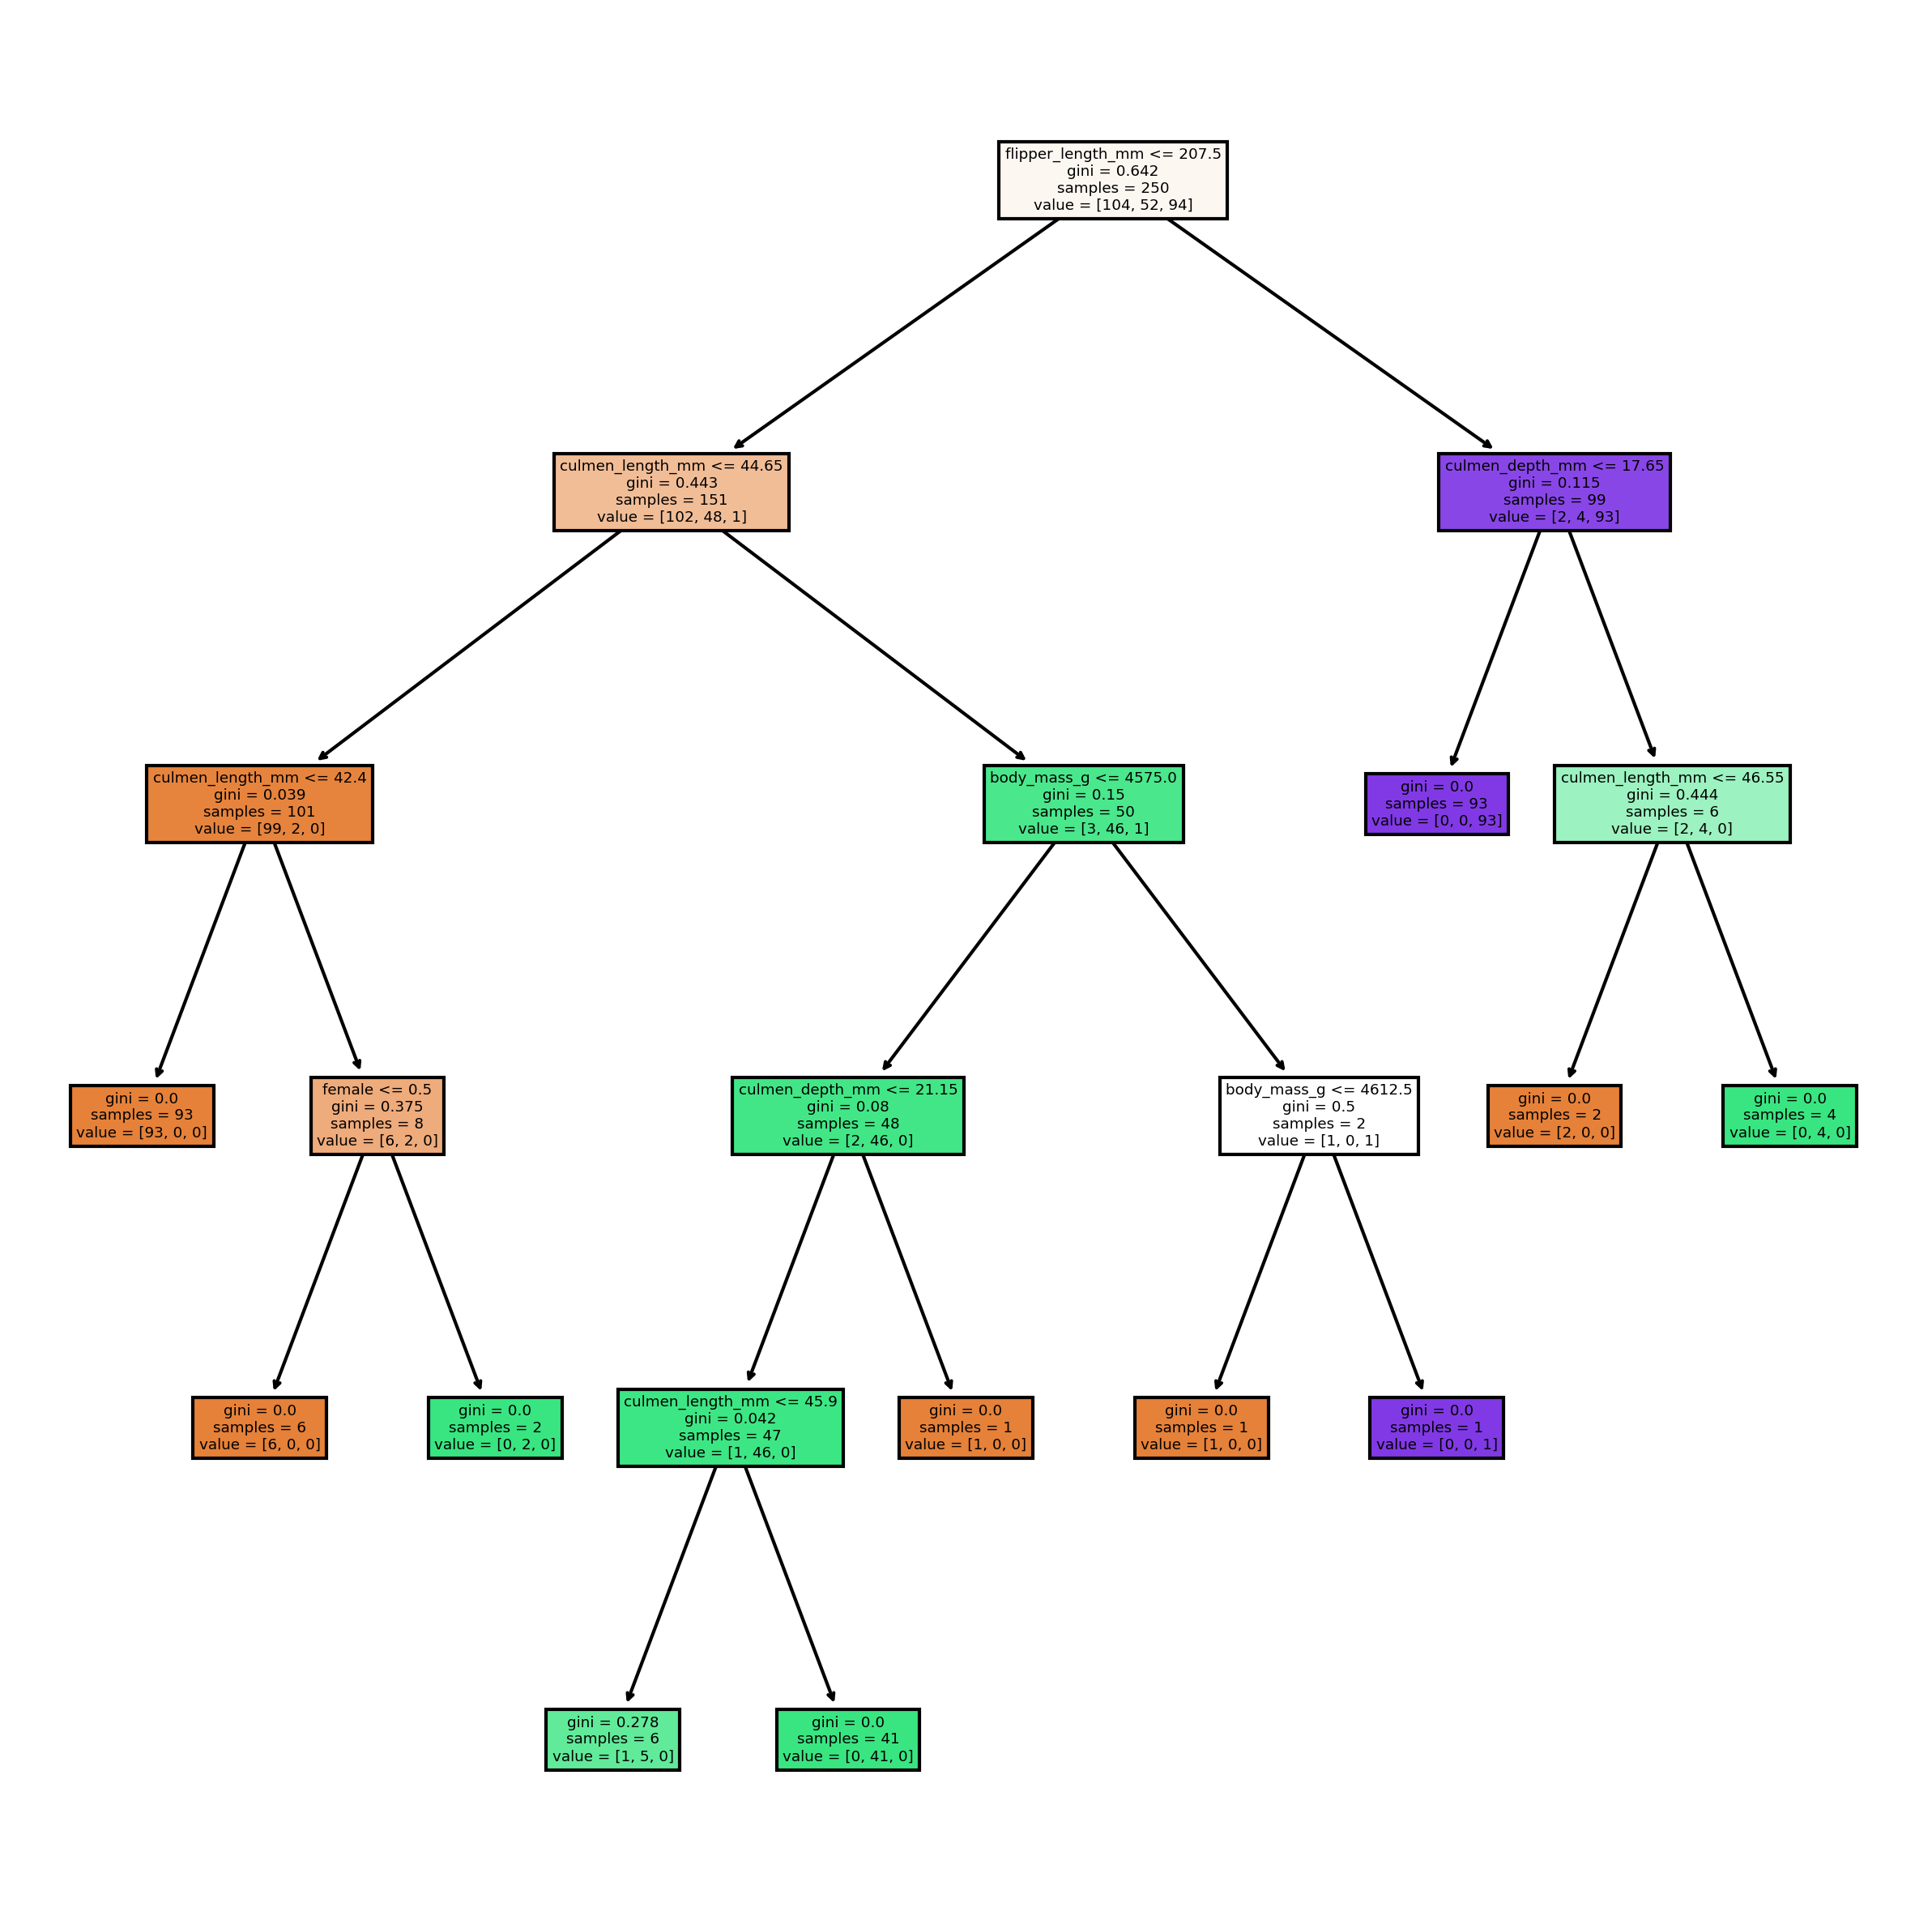

In [24]:
from sklearn.tree import plot_tree

feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()